In [ ]:
library(tidyverse)
library(tidymodels)
library(cowplot)

Warning message:
“package ‘cowplot’ was built under R version 4.3.2”

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp




In [ ]:
# clean and wrangle data
cleveland_data <- read_csv("data/processed_cleveland.csv")|>
                mutate(sex = as_factor(sex),
                       cp = as_factor(cp),
                       fbs = as_factor(fbs),
                       restecg = as_factor(restecg),
                       exang = as_factor(exang),
                       slope = as_factor(slope),
                       thal = as_factor(thal),
                       num = as_factor(num),
                       ca = as.integer(ca))|>
                rename(chest_pain = cp,
                       blood_pressure = trestbps,
                       cholesterol = chol,
                       blood_sugar = fbs,
                       rest_ecg = restecg,
                       heart_rate = thalach,
                       angina = exang,
                       st_depression = oldpeak,
                       num_vessels = ca,
                       diagnosis = num)

cleveland_data

In [ ]:
# splitting data into training and testing
cleveland_split <- initial_split(cleveland_data, prop = 0.75, strata = diagnosis)
cleveland_train <- training(cleveland_split)
cleveland_test <- testing(cleveland_split)

glimpse(cleveland_train)

Rows: 227
Columns: 14
$ age            <dbl> 63, 37, 41, 57, 57, 44, 52, 57, 54, 48, 58, 50, 58, 66,…
$ sex            <fct> 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1…
$ chest_pain     <fct> 1, 3, 2, 4, 4, 2, 3, 3, 4, 3, 1, 3, 3, 1, 4, 1, 4, 3, 4…
$ blood_pressure <dbl> 145, 130, 130, 120, 140, 120, 172, 150, 140, 130, 150, …
$ cholesterol    <dbl> 233, 250, 204, 354, 192, 263, 199, 168, 239, 275, 283, …
$ blood_sugar    <fct> 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0…
$ rest_ecg       <fct> 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0…
$ heart_rate     <dbl> 150, 187, 172, 163, 148, 173, 162, 174, 160, 139, 162, …
$ angina         <fct> 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0…
$ st_depression  <dbl> 2.3, 3.5, 1.4, 0.6, 0.4, 0.0, 0.5, 1.6, 1.2, 0.2, 1.0, …
$ slope          <fct> 3, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 2, 1, 1…
$ num_vessels    <chr> "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0",…
$ thal           <

In [ ]:
# summarizing the number of observations of each diagnosis in the training data
heart_disease_proportions <- cleveland_train |>
                          group_by(diagnosis) |>
                          summarize(n = n()) |>
                          mutate(percent = 100*n/nrow(cleveland_train))

heart_disease_proportions

<<<<<<< local <removed>


diagnosis,n,percent
<fct>,<int>,<dbl>
0,124,54.625551
1,42,18.502203
2,27,11.894273
3,26,11.453744
4,8,3.524229


>>>>>>> remote <modified: text/html, text/latex, text/markdown, text/plain>


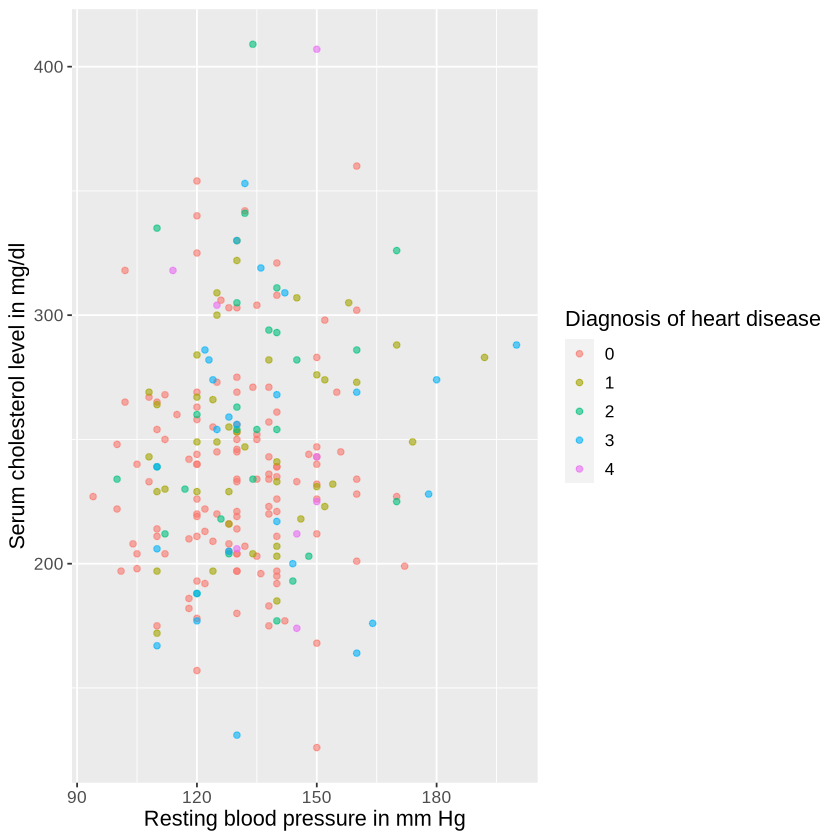

In [ ]:
rbp_chol_plot <- ggplot(cleveland_train, aes(x = blood_pressure, y = cholesterol, color = diagnosis)) +
                geom_point(alpha = 0.6) +
                labs(x = "Resting blood pressure in mm Hg", 
                     y = "Serum cholesterol level in mg/dl", 
                     color = "Diagnosis of heart disease") +
                theme(text = element_text(size = 13))
rbp_chol_plot

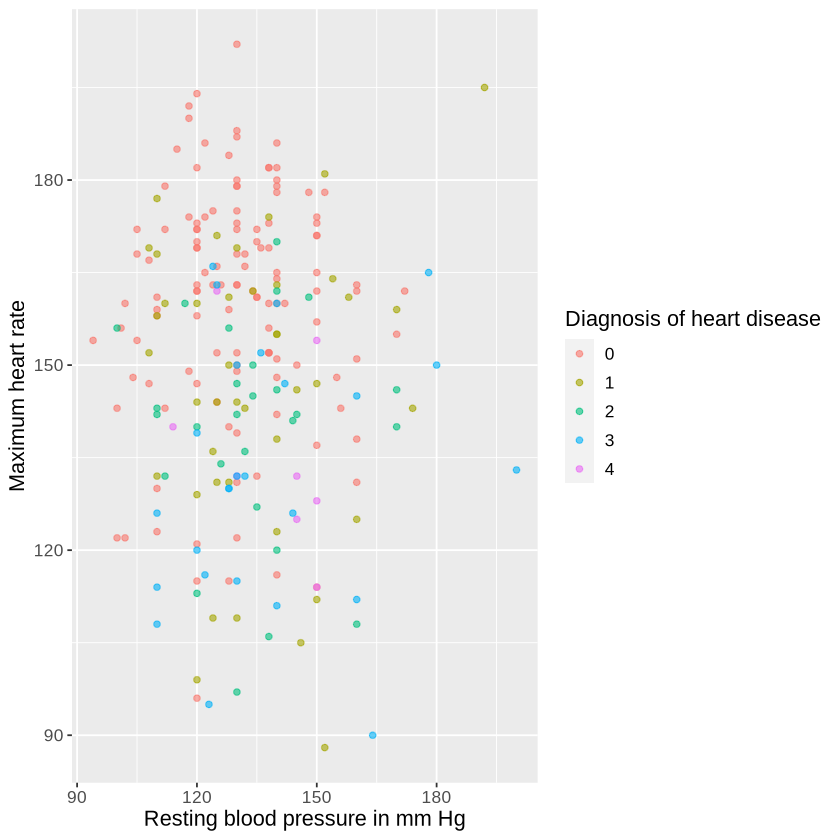

In [ ]:
rbp_hr_plot <- ggplot(cleveland_train, aes(x = blood_pressure, y = heart_rate, color = diagnosis)) +
                geom_point(alpha = 0.6) +
                labs(x = "Resting blood pressure in mm Hg", 
                     y = "Maximum heart rate", 
                     color = "Diagnosis of heart disease") +
                theme(text = element_text(size = 13))
rbp_hr_plot

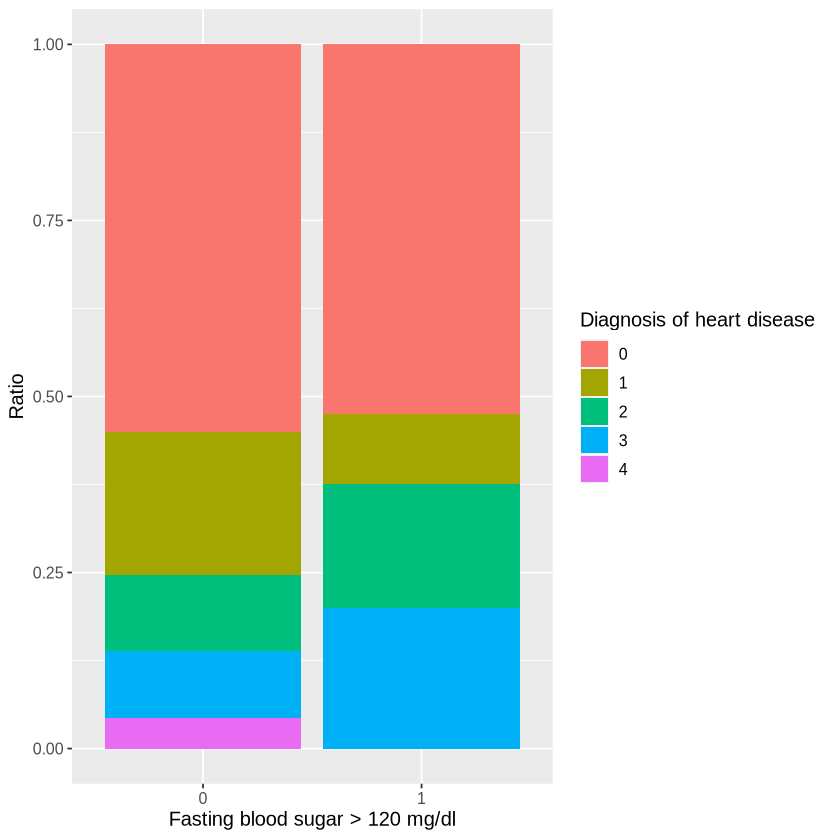

In [ ]:
fbs_ratio_plot <- ggplot(cleveland_train, aes(x = blood_sugar, fill = diagnosis)) +
                geom_bar(position = "fill") +
                labs(x = "Fasting blood sugar > 120 mg/dl",
                     y = "Ratio",
                     fill = "Diagnosis of heart disease") +
                theme(text = element_text(size = 12))
fbs_ratio_plot

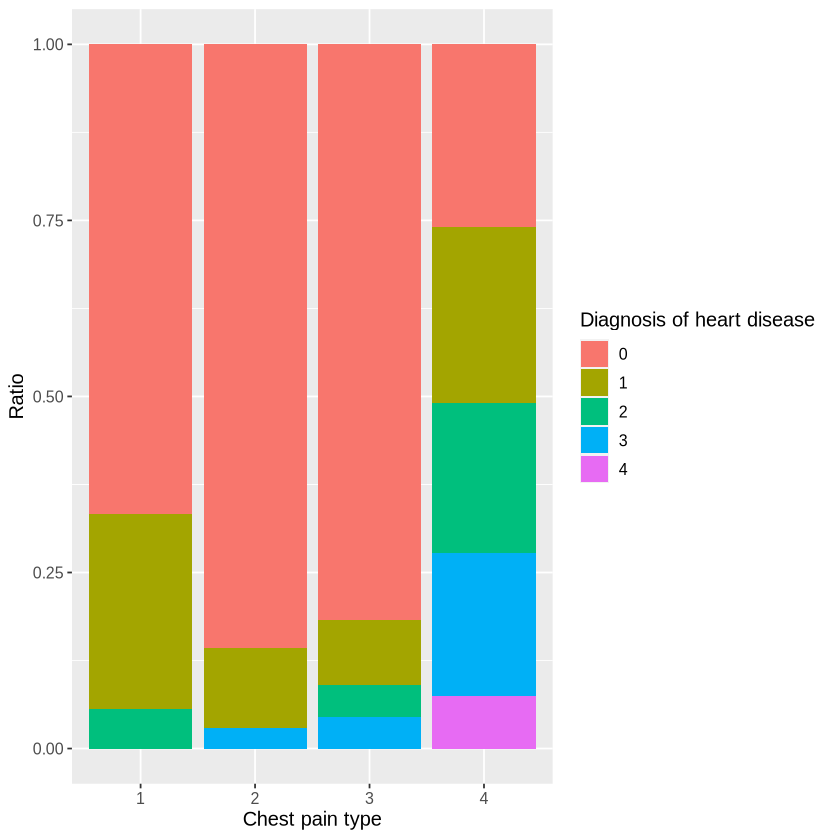

In [ ]:
cp_ratio_plot <- ggplot(cleveland_train, aes(x = chest_pain, fill = diagnosis)) +
                geom_bar(position = "fill") +
                labs(x = "Chest pain type",
                     y = "Ratio",
                     fill = "Diagnosis of heart disease") +
                theme(text = element_text(size = 12))
cp_ratio_plot

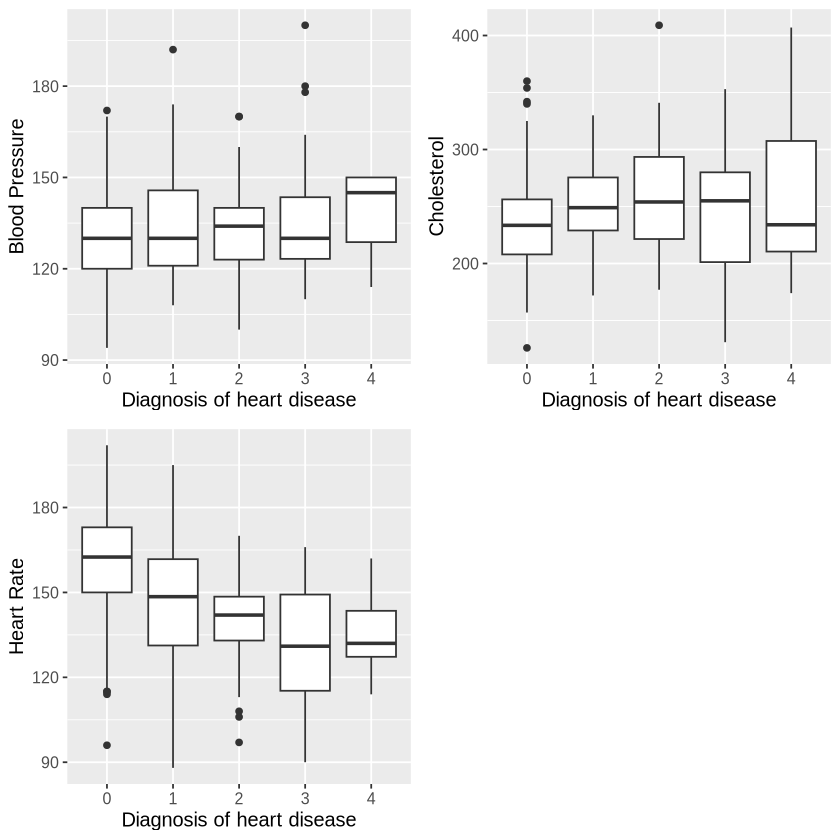

In [21]:
bp_box_plot <- cleveland_train |> ggplot(aes(x = diagnosis, y = blood_pressure)) + geom_boxplot() +
labs(x = "Diagnosis of heart disease", y = "Blood Pressure") + 
theme(text = element_text(size = 12))
chol_box_plot <- cleveland_train |> ggplot(aes(x = diagnosis, y = cholesterol)) + geom_boxplot() +
labs(x = "Diagnosis of heart disease", y = "Cholesterol") + 
theme(text = element_text(size = 12))
hr_box_plot <- cleveland_train |> ggplot(aes(x = diagnosis, y = heart_rate)) + geom_boxplot() +
labs(x = "Diagnosis of heart disease", y = "Heart Rate") + 
theme(text = element_text(size = 12))
plot_grid(bp_box_plot, chol_box_plot, hr_box_plot, ncol = 2)
